/tmp/ipython-input-535759571.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key="Order Date", freq="M"))["Sales"]


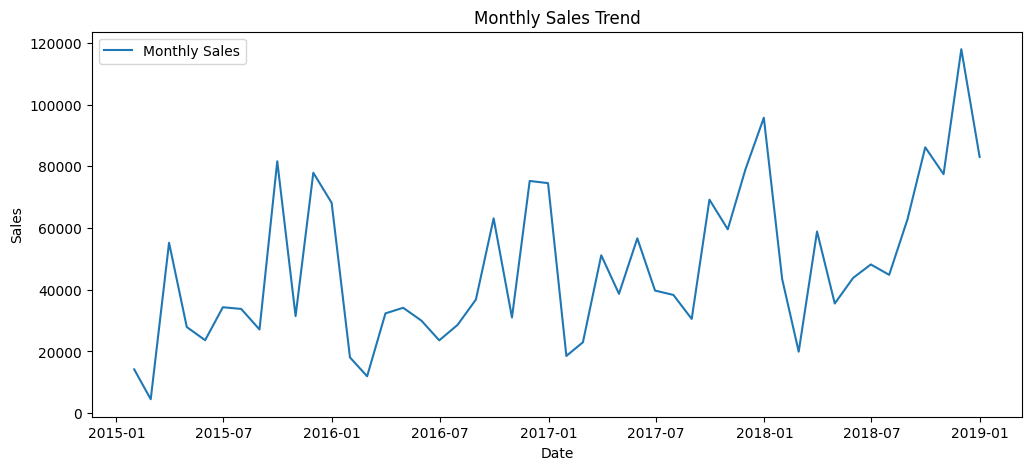

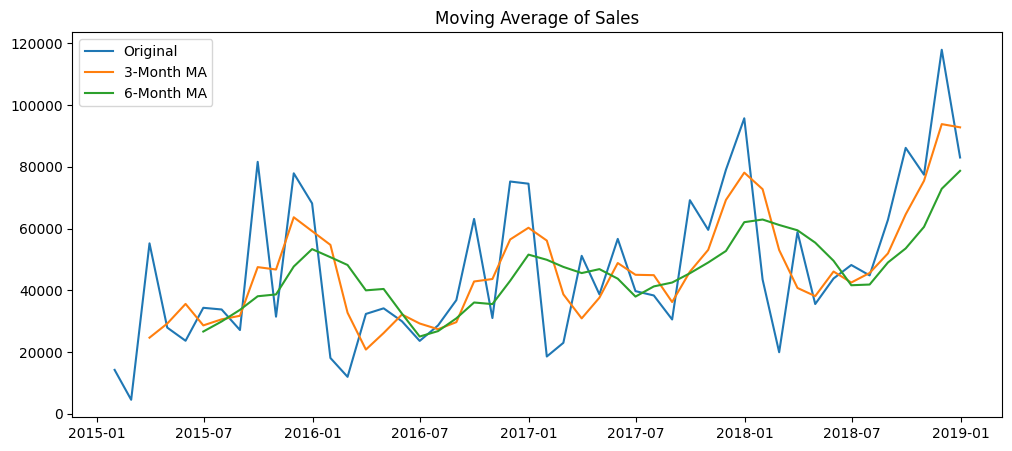

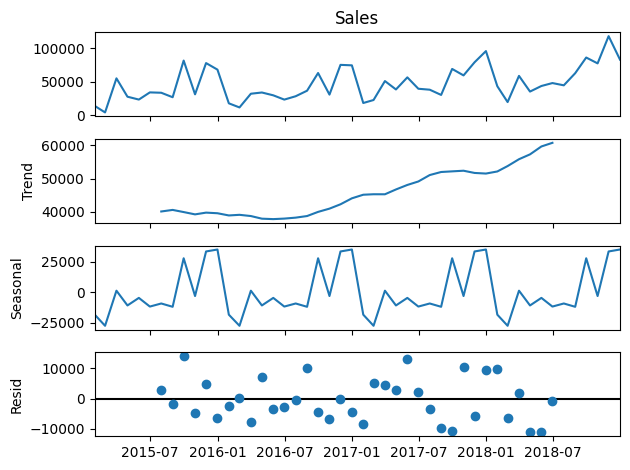

/tmp/ipython-input-535759571.py:69: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(["Region", pd.Grouper(key="Order Date", freq="M")])["Sales"]


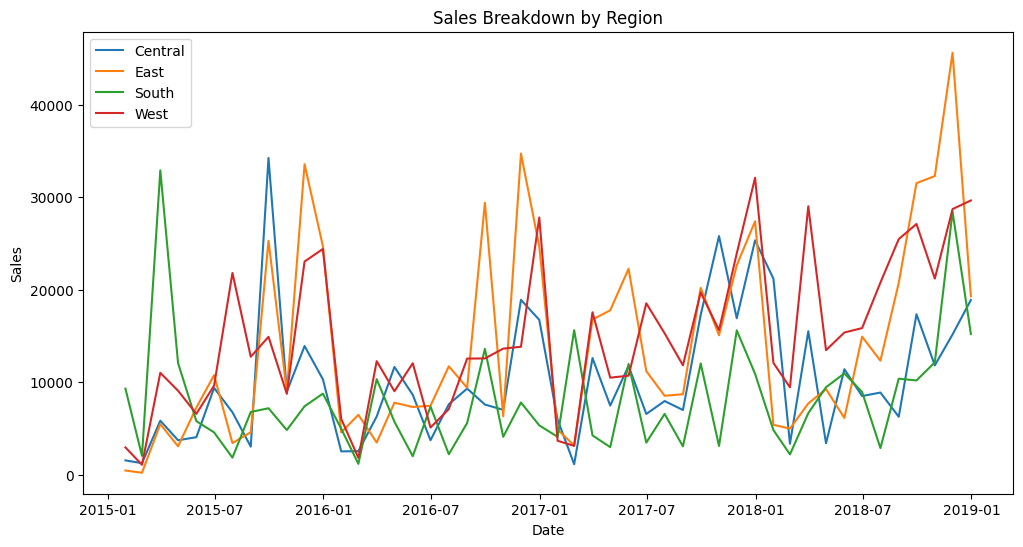

/tmp/ipython-input-535759571.py:89: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(["Category", pd.Grouper(key="Order Date", freq="M")])["Sales"]


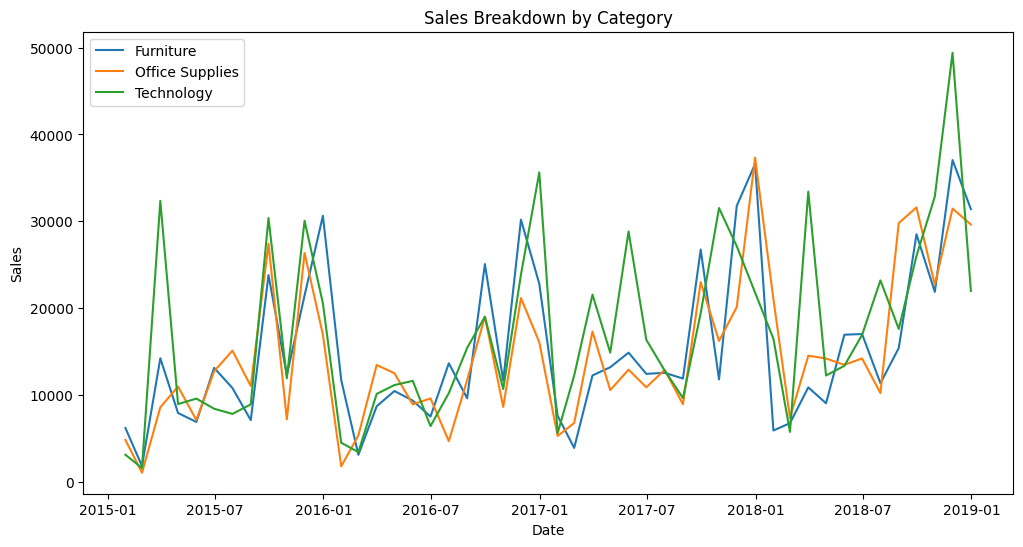

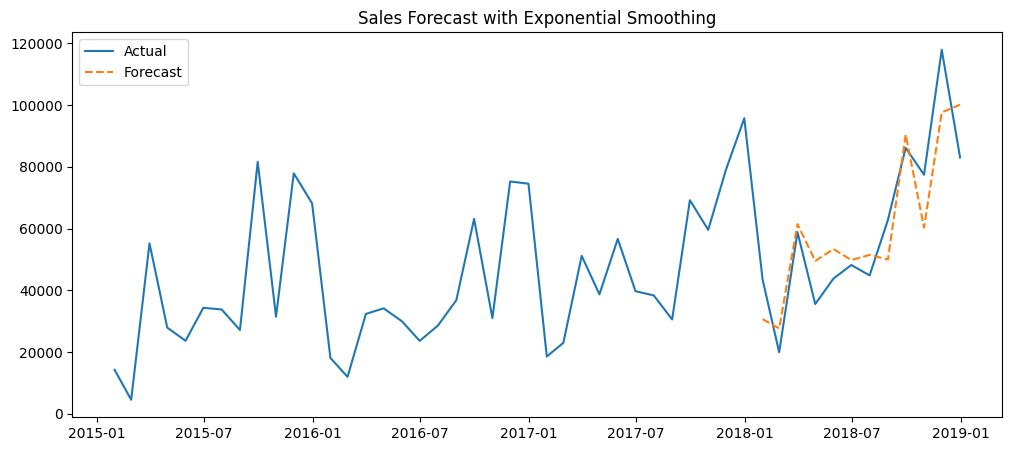

In [ ]:

# Task 7: Time Series Breakdown of Retail Sales
# Using Superstore Dataset (train.csv)
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load Dataset

df = pd.read_csv("train.csv")

# Parse order date safely
try:
    df["Order Date"] = pd.to_datetime(df["Order Date"])
except:
    df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)

# Monthly Aggregated Sales
monthly_sales = (
    df.groupby(pd.Grouper(key="Order Date", freq="M"))["Sales"]
    .sum()
    .reset_index()
)

# Trend Visualization
plt.figure(figsize=(12,5))
plt.plot(monthly_sales["Order Date"], monthly_sales["Sales"], label="Monthly Sales")
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Moving Average (Rolling Mean)
monthly_sales["MA_3"] = monthly_sales["Sales"].rolling(window=3).mean()
monthly_sales["MA_6"] = monthly_sales["Sales"].rolling(window=6).mean()

plt.figure(figsize=(12,5))
plt.plot(monthly_sales["Order Date"], monthly_sales["Sales"], label="Original")
plt.plot(monthly_sales["Order Date"], monthly_sales["MA_3"], label="3-Month MA")
plt.plot(monthly_sales["Order Date"], monthly_sales["MA_6"], label="6-Month MA")
plt.title("Moving Average of Sales")
plt.legend()
plt.show()
# Seasonal Decomposition
decomposition = seasonal_decompose(
    monthly_sales.set_index("Order Date")["Sales"], model="additive", period=12
)
decomposition.plot()
plt.show()

# Revenue Breakdown by Region
region_sales = (
    df.groupby(["Region", pd.Grouper(key="Order Date", freq="M")])["Sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
for region in region_sales["Region"].unique():
    subset = region_sales[region_sales["Region"] == region]
    plt.plot(subset["Order Date"], subset["Sales"], label=region)

plt.title("Sales Breakdown by Region")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Revenue Breakdown by Category
category_sales = (
    df.groupby(["Category", pd.Grouper(key="Order Date", freq="M")])["Sales"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(12,6))
for category in category_sales["Category"].unique():
    subset = category_sales[category_sales["Category"] == category]
    plt.plot(subset["Order Date"], subset["Sales"], label=category)

plt.title("Sales Breakdown by Category")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Simple Forecast (Exponential Smoothing)
train = monthly_sales[:-12]  # train on all but last year
test = monthly_sales[-12:]   # hold out last year

model = ExponentialSmoothing(
    train["Sales"], trend="add", seasonal="add", seasonal_periods=12
).fit()

forecast = model.forecast(len(test))

plt.figure(figsize=(12,5))
plt.plot(monthly_sales["Order Date"], monthly_sales["Sales"], label="Actual")
plt.plot(test["Order Date"], forecast, label="Forecast", linestyle="--")
plt.title("Sales Forecast with Exponential Smoothing")
plt.legend()
plt.show()
